## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import plotly.io as pio
pio.renderers.default='notebook'
from IPython.display import Image

## 2. Loading Dataset

In [2]:
df=pd.read_csv('Loan Dataset.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## 3. Data Cleaning

First we create a dataframe that shows the percentage of null values in each column of df.

In [6]:
100*df.isnull().sum()/df.shape[0]

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

Now we select the columns that contain between 0.5% and 70% null values, and replace the null values with the mean (for numerical columns) or median (for categorical columns) of each column.

**Gender**

In [7]:
pd.get_dummies(df['Gender'].dropna(), drop_first=True).median()

Male    1.0
dtype: float64

In [8]:
df['Gender']=df['Gender'].fillna('Male')   

**Dependents**

In [9]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [10]:
df['Dependents'].dtypes

dtype('O')

In [11]:
le=LabelEncoder()
le.fit(df['Dependents'].dropna())
pd.Series(le.transform(df['Dependents'].dropna())).median()

0.0

In [12]:
df['Dependents']=df['Dependents'].fillna('0')   

**Self_Employed**

In [13]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [14]:
pd.get_dummies(df['Self_Employed'].dropna(), drop_first=True).median()

Yes    0.0
dtype: float64

In [15]:
df['Self_Employed']=df['Self_Employed'].fillna('No')   

**LoanAmount**

In [16]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())   

**Loan_Amount_Term**

In [17]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [18]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())   

**Credit_History**

In [19]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [20]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].median())   

**Married**

Fianlly the Married column that contain less than 0.5% null values is remained, and we drop the rows of df that contain these null values.

In [21]:
df.dropna(inplace=True)

In [22]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## 4. Feature Engineering

We rename some of the columns.

In [23]:
df.columns=df.columns.str.lower()

In [24]:
df.columns=['loan_id', 'gender', 'married', 'dependents', 'education','self_employed', 'applicant_income', 'co-applicant_income', 'loan_amount', 'loan_amount_term', 'credit_history', 'property_area', 'loan_status']

In [25]:
df.head(2)

,loan_id,gender,married,dependents,education,self_employed,applicant_income,co-applicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N


In [26]:
df.shape

(611, 13)

In [27]:
df.describe()

,applicant_income,co-applicant_income,loan_amount,loan_amount_term,credit_history
count,611.000000,611.000000,611.000000,611.000000,611.000000
mean,5399.513912,1627.972046,146.370958,342.324059,0.854337
std,6120.764249,2931.747971,84.240751,64.208419,0.353057
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2875.500000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1213.000000,128.000000,360.000000,1.000000
75%,5790.000000,2304.000000,165.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


## 5. Exploratory Data Analysis

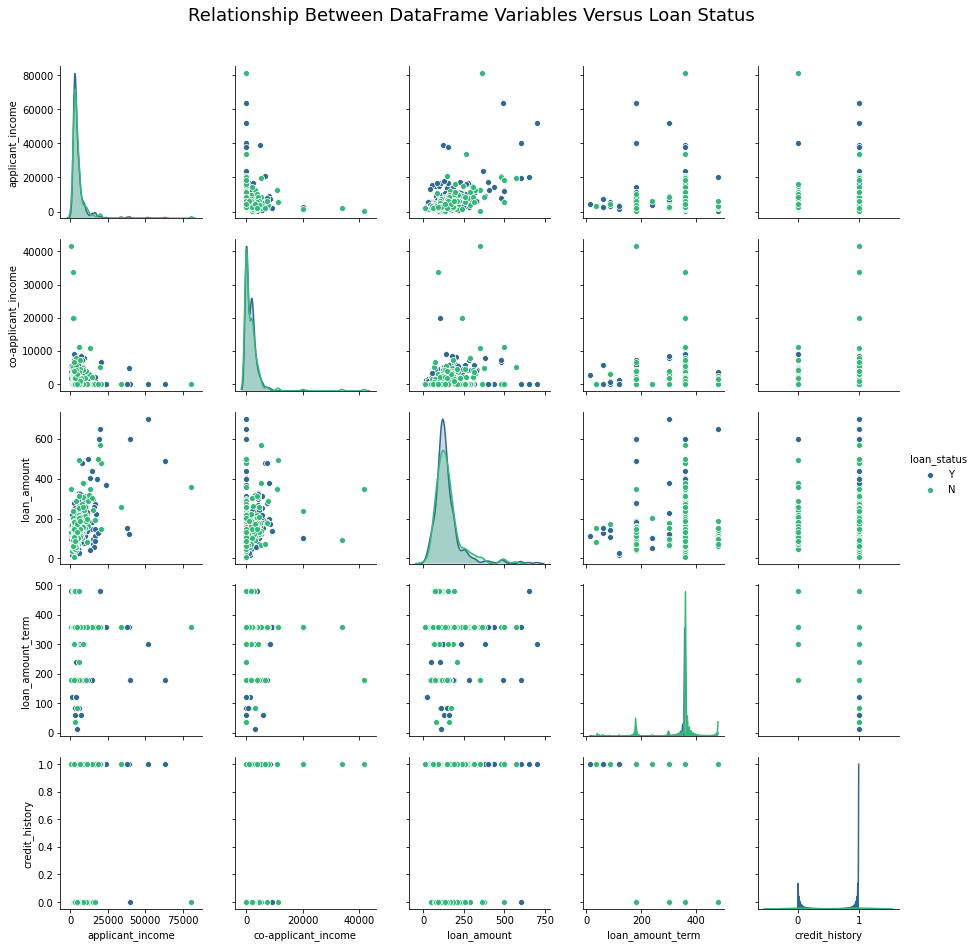

In [28]:
sns.pairplot(df,hue='loan_status',palette='viridis')
plt.suptitle('Relationship Between DataFrame Variables Versus Loan Status',x=0.48, y=1.05, fontsize=18)
plt.show()

Now we want to figure out how many applicants are eligible for loan.

In [29]:
df[df['loan_status']=='Y'].count()['loan_status']

419

In [30]:
df[df['loan_status']=='N'].count()['loan_status']

192

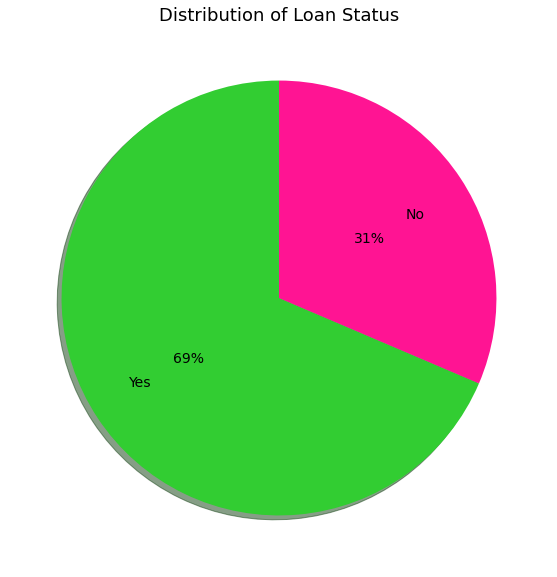

In [31]:
plt.figure(figsize=(10,10))
plt.pie(x=[419,192], labels=['Yes','No'], autopct='%1.0f%%', pctdistance=0.5,labeldistance=0.7,shadow=True, startangle=90, colors=['limegreen', 'deeppink'], textprops={'fontsize':14})
plt.title('Distribution of Loan Status', fontsize=18)
plt.show()

We can see that bank approves loans requested by 69% of applicants and does not approve loans requested by 39% of applicants.

Let's find visualize the impacts of different factors on loan status.

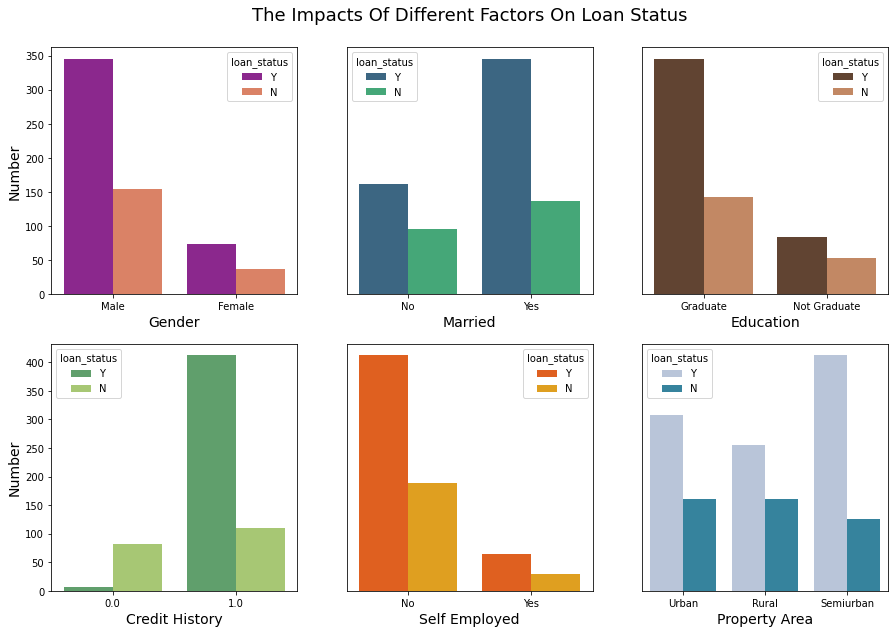

In [32]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.countplot(x='gender' ,hue='loan_status', data=df,palette='plasma')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number', fontsize=14)

plt.subplot(2,3,2)
sns.countplot(x='married',hue='loan_status',data=df,palette='viridis')
plt.ylabel(' ')
plt.yticks([ ])
plt.xlabel('Married', fontsize=14)
plt.title('The Impacts Of Different Factors On Loan Status\n', fontsize=18)

plt.subplot(2,3,3)
sns.countplot(x='education',hue='loan_status',data=df,palette='copper')
plt.xlabel('Education', fontsize=14)
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,4)
sns.countplot(x='credit_history', data=df,hue='loan_status',palette='summer')
plt.xlabel('Credit History', fontsize=14)
plt.ylabel('Number', fontsize=14)

plt.subplot(2,3,5)
sns.countplot(x='self_employed',hue='loan_status',data=df,palette='autumn')
plt.xlabel('Self Employed', fontsize=14)
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,6)
sns.countplot(x='property_area',hue='loan_status',data=df,palette='PuBuGn')
plt.xlabel('Property Area', fontsize=14)
plt.ylabel(' ')
plt.yticks([ ])
plt.show()

From the above analysis, it can be concluded that:

- Male Individuals have more chance of receiving the Loan.

- Married Individuals have more chance of receiving the Loan.
   
- Graduate Individuals have more chance of receiving the Loan.
    
- Not Self-Employed have more chance of receiving the Loan.

- Individuals with a credit history have more chance of receiving the Loan.
    
- People living in Semi-Urban Area have more chance to receive the Loan.

Now we illustrate the loan status versus the gender, marrital status and education of individuals.

In [33]:
df['married_revised']=df['married'].apply(lambda x: 'Married' if x=='Yes' else 'Single')

In [34]:
df['loan_status_revised']=df['loan_status'].apply(lambda x: 'Receive Loan' if x=='Y' else 'Not Receive Loan')

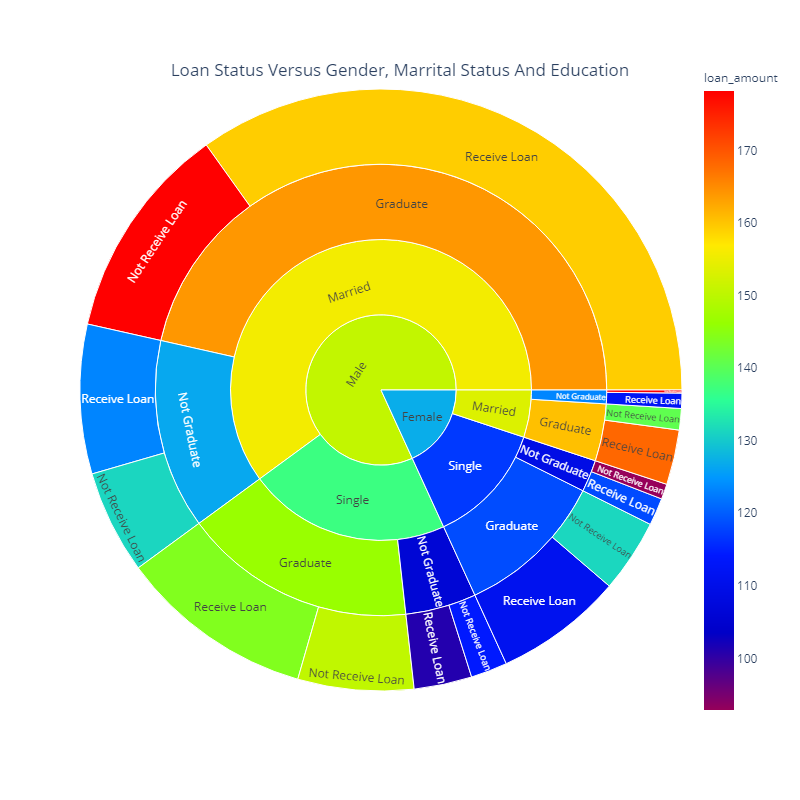

In [35]:
fig=px.sunburst( data_frame=df,path=['gender','married_revised','education','loan_status_revised'], color='loan_amount', color_continuous_scale='rainbow', height=800, width=800)
fig.update_layout(
    title={
        'text': 'Loan Status Versus Gender, Marrital Status And Education \n',
        'y':0.92,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
Image(pio.to_image(fig,format='png'))

In [36]:
df.drop(['married_revised','loan_status_revised'], axis=1, inplace=True)

Now we visualize the impacts of different factors on the amount of loans.

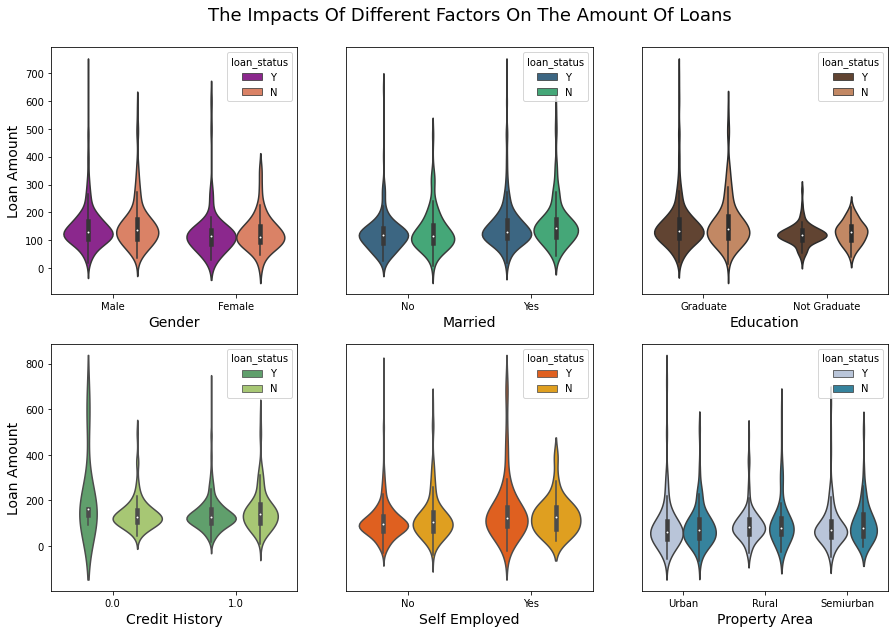

In [37]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.violinplot(x='gender', y='loan_amount',hue='loan_status', data=df,palette='plasma')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Loan Amount', fontsize=14)

plt.subplot(2,3,2)
sns.violinplot(x='married',y='loan_amount',hue='loan_status',data=df,palette='viridis')
plt.xlabel('Married', fontsize=14)
plt.ylabel(' ')
plt.yticks([ ])
plt.title('The Impacts Of Different Factors On The Amount Of Loans\n', fontsize=18)

plt.subplot(2,3,3)
sns.violinplot(x='education',y='loan_amount',hue='loan_status',data=df,palette='copper')
plt.xlabel('Education', fontsize=14)
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,4)
sns.violinplot(x='credit_history',y='loan_amount', data=df,hue='loan_status',palette='summer')
plt.xlabel('Credit History', fontsize=14)
plt.ylabel('Loan Amount', fontsize=14)

plt.subplot(2,3,5)
sns.violinplot(x='self_employed',y='loan_amount',hue='loan_status',data=df,palette='autumn')
plt.xlabel('Self Employed', fontsize=14)
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,6)
sns.violinplot(x='property_area', y='loan_amount',data=df,hue='loan_status',palette='PuBuGn')
plt.xlabel('Property Area', fontsize=14)
plt.ylabel(' ')
plt.yticks([ ])
plt.show()

Now we analyze the distribution of applicant_income, co-applicant_income and loan_amount.

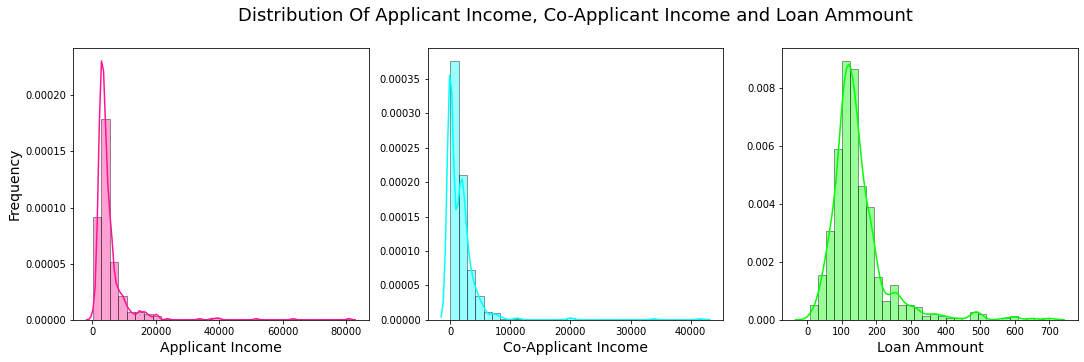

In [38]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.distplot(df['applicant_income'],bins=30,color='deeppink',hist_kws=dict(edgecolor='black'))
plt.xlabel('Applicant Income', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.subplot(1,3,2)
sns.distplot(df['co-applicant_income'],bins=30,color='cyan',hist_kws=dict(edgecolor='black'))
plt.xlabel('Co-Applicant Income', fontsize=14)
plt.title('Distribution Of Applicant Income, Co-Applicant Income and Loan Ammount\n', fontsize=18)

plt.subplot(1,3,3)
sns.distplot(df['loan_amount'],bins=30,color='lime',hist_kws=dict(edgecolor='black'))
plt.xlabel('Loan Ammount', fontsize=14)
plt.show()

Here we visualize the relationship between applicant_income, co-applicant_income and loan_amount.

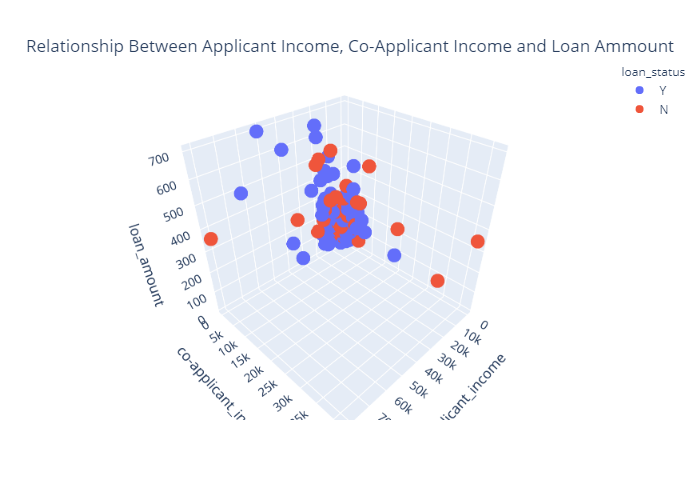

In [39]:
fig=px.scatter_3d(data_frame=df,x='applicant_income',y='co-applicant_income',z='loan_amount',color='loan_status')
fig.update_layout(
    title={
        'text': 'Relationship Between Applicant Income, Co-Applicant Income and Loan Ammount',
        'y':0.92,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
Image(pio.to_image(fig,format='png'))

## 6. Predicting Loan Status

### 6.1. Encoding Categorical Variables

**Gender**

In [40]:
le1=LabelEncoder()
le1.fit(df['gender'])
df['gender']=le1.transform(df['gender'])

**Married**

In [41]:
le2=LabelEncoder()
le2.fit(df['married'])
df['married']=le2.transform(df['married'])

**Education**

In [42]:
le3=LabelEncoder()
le3.fit(df['education'])
df['education']=le3.transform(df['education'])

**Self Employed**

In [43]:
le4=LabelEncoder()
le4.fit(df['self_employed'])
df['self_employed']=le4.transform(df['self_employed'])

**Property Area**

In [44]:
le5=LabelEncoder()
le5.fit(df['property_area'])
df['property_area']=le5.transform(df['property_area'])

**Dependents**

In [45]:
le6=LabelEncoder()
le6.fit(df['dependents'])
df['dependents']=le6.transform(df['dependents'])

### 6.2. Splitting the Data

In [46]:
X=df.drop(['loan_id','loan_status'],axis=1)
y=df['loan_status']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

### 6.3. Logistic Regression

In [48]:
lr=LogisticRegression()
lr.fit(X,y)
predictions_lr=lr.predict(X_test)

C:\Users\Soha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [49]:
print(confusion_matrix(y_test,predictions_lr))
print('\n')
print(classification_report(y_test,predictions_lr))

[[23 22]
 [ 0 78]]


              precision    recall  f1-score   support

           N       1.00      0.51      0.68        45
           Y       0.78      1.00      0.88        78

    accuracy                           0.82       123
   macro avg       0.89      0.76      0.78       123
weighted avg       0.86      0.82      0.80       123



### 6.4. Decision Tree Classifier

In [50]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
predictions_dtc=dtc.predict(X_test)

In [51]:
print(confusion_matrix(y_test,predictions_dtc))
print("\n")
print(classification_report(y_test,predictions_dtc))

[[27 18]
 [14 64]]


              precision    recall  f1-score   support

           N       0.66      0.60      0.63        45
           Y       0.78      0.82      0.80        78

    accuracy                           0.74       123
   macro avg       0.72      0.71      0.71       123
weighted avg       0.74      0.74      0.74       123



### 6.5. Random Forest Classifier

In [52]:
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
predictions_rfc=rfc.predict(X_test)

In [53]:
print(confusion_matrix(y_test,predictions_rfc))
print('\n')
print(classification_report(y_test,predictions_rfc))

[[23 22]
 [ 2 76]]


              precision    recall  f1-score   support

           N       0.92      0.51      0.66        45
           Y       0.78      0.97      0.86        78

    accuracy                           0.80       123
   macro avg       0.85      0.74      0.76       123
weighted avg       0.83      0.80      0.79       123



### 6.6. K-Nearest Neighbors Classifier

In [54]:
error_rate=[]
for n in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    predictions_knn=knn.predict(X_test)
    error_rate.append(np.mean(predictions_knn!=y_test))

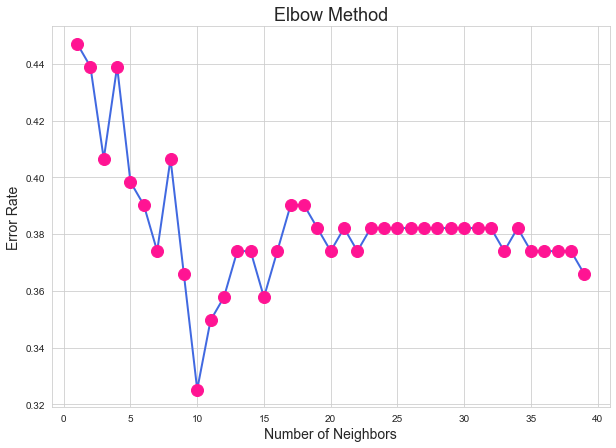

In [55]:
plt.figure(figsize=(10,7))
sns.set_style('whitegrid')
plt.plot(list(range(1,40)),error_rate,color='royalblue', marker='o', linewidth=2, markersize=12, markerfacecolor='deeppink', markeredgecolor='deeppink')
plt.xlabel('Number of Neighbors', fontsize=14)
plt.ylabel('Error Rate', fontsize=14)
plt.title('Elbow Method', fontsize=18)
plt.show()

In [56]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
predictions_knn=knn.predict(X_test)

In [57]:
print(confusion_matrix(y_test,predictions_knn))
print('\n')
print(classification_report(y_test,predictions_knn))

[[10 35]
 [ 5 73]]


              precision    recall  f1-score   support

           N       0.67      0.22      0.33        45
           Y       0.68      0.94      0.78        78

    accuracy                           0.67       123
   macro avg       0.67      0.58      0.56       123
weighted avg       0.67      0.67      0.62       123



### 6.7. Support Vector Classifier

In [58]:
svc=SVC()
svc.fit(X_train,y_train)
predictions_svc=svc.predict(X_test)

C:\Users\Soha\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



In [59]:
print(confusion_matrix(y_test,predictions_svc))
print('\n')
print(classification_report(y_test,predictions_svc))

[[ 0 45]
 [ 0 78]]


              precision    recall  f1-score   support

           N       0.00      0.00      0.00        45
           Y       0.63      1.00      0.78        78

    accuracy                           0.63       123
   macro avg       0.32      0.50      0.39       123
weighted avg       0.40      0.63      0.49       123



C:\Users\Soha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



To improve the results obtained by SVC, we use GridSearchCV and define C and gamma parameters.

In [60]:
param_grid={'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001], 'kernel':['rbf']}

In [61]:
gs=GridSearchCV(SVC(),param_grid, verbose=3)
gs.fit(X_train,y_train)
predictions_gs=gs.predict(X_test)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.699, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


C:\Users\Soha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.699, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.698, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.699, total=   0.0s

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.699, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.698, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.699, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.699, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.698, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.699, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.699, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    2.3s finished


In [62]:
print(confusion_matrix(y_test,predictions_gs))
print('\n')
print(classification_report(y_test,predictions_gs))

[[ 4 41]
 [ 4 74]]


              precision    recall  f1-score   support

           N       0.50      0.09      0.15        45
           Y       0.64      0.95      0.77        78

    accuracy                           0.63       123
   macro avg       0.57      0.52      0.46       123
weighted avg       0.59      0.63      0.54       123



We can see that even optimization of SVC model by Grid Search does not improve the accuracy.

### 6.8. XGBoost Classifier

In [63]:
xgbc=xgb.XGBClassifier(n_estimators=200, learning_rate=0.08, gamma=0, subsample=0.5,colsample_bytree=1, max_depth=8)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.08, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [64]:
predictions_xgbc=xgbc.predict(X_test)

In [65]:
print(confusion_matrix(y_test,predictions_xgbc))
print('\n')
print(classification_report(y_test,predictions_xgbc))

[[26 19]
 [ 4 74]]


              precision    recall  f1-score   support

           N       0.87      0.58      0.69        45
           Y       0.80      0.95      0.87        78

    accuracy                           0.81       123
   macro avg       0.83      0.76      0.78       123
weighted avg       0.82      0.81      0.80       123



In [66]:
print('Accuracy Score, Logistic Regression: ', round(accuracy_score(y_test,predictions_lr),ndigits=4))
print('Accuracy Score, Decision Tree Classifier: ', round(accuracy_score(y_test,predictions_dtc),ndigits=4))
print('Accuracy Score, Random Forest Classifier: ', round(accuracy_score(y_test,predictions_rfc),ndigits=4))
print('Accuracy Score, K-Nearest Neighbors Classifier: ', round(accuracy_score(y_test,predictions_knn),ndigits=4))
print('Accuracy Score, Support Vector Classifier: ', round(accuracy_score(y_test,predictions_gs),ndigits=4))
print('Accuracy Score, XGBoost Classifier: ', round(accuracy_score(y_test,predictions_xgbc), ndigits=4))

Accuracy Score, Logistic Regression:  0.8211
Accuracy Score, Decision Tree Classifier:  0.7398
Accuracy Score, Random Forest Classifier:  0.8049
Accuracy Score, K-Nearest Neighbors Classifier:  0.6748
Accuracy Score, Support Vector Classifier:  0.6341
Accuracy Score, XGBoost Classifier:  0.813


So we conclude that Logistic Regression with the accuracy of 82.11% is the best model to predict whether the bank will approve the loan or not.

## 7. Conclusion

-  We performed Data Cleaning and Feature Engineering to convert the dataset to an acceptable format.

-  We performed Exploratory Data Analysis and visualized the loan status versus different features.

- Logistic Regression algorithm with the accuracy of 82.11% was the best model for predicting whether the bank will approve the requested loans.